<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Exercícios de Aprendizagem de Máquina</font>

 Essa lista de exercícios foi criada para que vocês possam aplicar os conhecimentos que vocês adquiriram na aula que assistiram.

Podem tirar dúvidas com **Tales Nobre** e **Felipe Duarte** quando quiserem!
**O prazo de envio do notebook é até a reunião da próxima semana, até 1 hora antes da reunião, podem enviar colocar o conteúdo na branch de vocês do repositório**



🌍 [Link do drive com o Dataset](https://drive.google.com/drive/folders/1xi7m5gzJflujzoDvkPMkRO28SlR4139n?usp=sharing)


###**Objetivos**


*   Entender o nível de conhecimento individual de vocês
*   Estimular vocês a praticarem as formas básicas de avaliar um modelo


##**Observações**



*   Façam uma cópia desse notebook e realizem as questões.
*   Foquem no espaço de *Conclusões*, que aparece no final de cada questão, para explicar as conclusões que vocês chegaram a partir da análise de dados.
*   É recomendável que vocês acessem os materiais de apoio que serão disponibilizados em seguida.
*   Prezem pela organização, é muito importante explicar cada etapa de execução, principalmente no contexto de análise de dados.
*   Claro que vocês não vão precisam importar várias vezes as bibliotecas dentro de um mesmo notebook, mas por fins educativos é recomendado que vocês façam isso nessa lista de exercícios!
*   As questões são progressivas, ou seja, a quantidade de instruções e o nível de dificuldade mudarão ao longo da lista. **Lembre-se de manter o mesmo padrão em todas as questões.**
*  Divida em quantas células e caixas de texto quiser, afim de deixar a legibilidade do código a melhor possível.



🐼 Material de apoio:

Repositório de apoio:
*   [Repositório do Github](https://github.com/talesnobre/miniproject_ML/blob/main/models.py)

Matriz de Confusão:
*   [O que é?](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


F1 Score (Acurácia, Precisão e Recall):
*   [O que é?](https://medium.com/@mateuspdua/machine-learning-m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-e-recall-d44c72307959)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Loss Function:
*   [O que é?](https://www.datarobot.com/blog/introduction-to-loss-functions/#:~:text=At%20its%20core%2C%20a%20loss,ll%20output%20a%20lower%20number.)
*   [SKlearn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html)


Lembrem-se, a prática leva à perfeição!🧠

#**Questão 1: Doenças Cardíacas**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

## Dataset (Não precisam mexer)

In [4]:
! pip install xgboost
! pip install lightgbm
! pip install catboost

In [1]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE


# evalue measures
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Completed.')

Completed.


In [3]:
df = pd.read_csv("data\heart.csv")

In [4]:
df.dropna(inplace=True)

In [5]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


In [9]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) # convert each label in the original dataset to the unique integer
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=110)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('---')
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (190260, 21)
y_train:  (190260,)
---
X_test:  (63420, 21)
y_test:  (63420,)


## Regresão Logística

In [11]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)


### Avaliação

In [56]:
y_pred #maquina ta avaliando

(63420,)

In [53]:
y_test #valor real

(63420,)

In [46]:
y_pred == y_test

array([False,  True,  True, ..., False,  True,  True])

In [30]:
#Acurácia simples
accuracy_score(y_test, y_pred)

0.9068432671081678

In [31]:
#F1-Score
f1_score(y_test, y_pred)

0.1990238611713666

In [41]:
#Loss Function
sklearn.metrics.log_loss(y_test, y_pred, eps='auto', normalize=True, sample_weight=None, labels=None)

3.3128107159439275

In [38]:
#Matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[56778,   747],
       [ 5161,   734]], dtype=int64)

<Axes: >

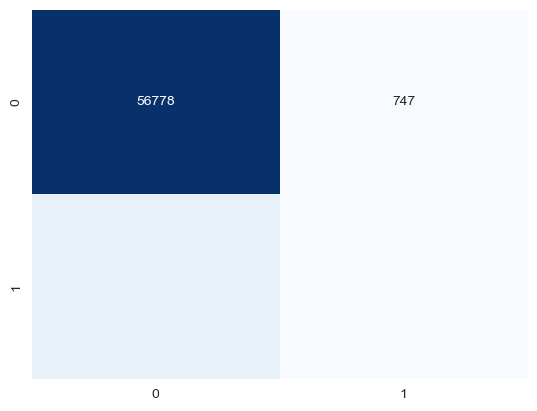

In [47]:
sns.heatmap(confusion_matrix, fmt='g', cmap= "Blues", cbar=False, annot=True)

## Rede Neural

In [40]:
neural_network_model = MLPClassifier()
neural_network_model.fit(X_train, y_train)

y_pred = neural_network_model.predict(X_test)


### Avaliação

## Conclusão

In [ ]:
conclusao = """
escreva sua conclusão aqui
"""

print(conclusao)

#**Questão 2: Raças de cachorro**




Use Acurácia, F1 Score, Matriz de confusão e Loss function para avaliar o desempenho do modelo.

### Dataset (Não precisam mexer)

In [ ]:
df = pd.read_csv("local-do-csv-dogs")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("group", axis=1), df["group"], test_size=0.25, random_state=42)



## Nayve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB #nb normal (sem ser gaussiano)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

model = GaussianNB()

model.fit(X_train, y_train)
predicted = model.predict(X_test)


### Avaliação

## Multi-Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=42, max_iter=1000).fit(X_train, y_train)

### Avaliação

## Conclusão

In [ ]:
conclusao = """
escreva sua conclusão aqui
"""

print(conclusao)